In [1]:
# Audio Analysis

In [11]:
from __future__ import division

%matplotlib inline
import os
import subprocess
import numpy as np
import scipy
#import librosa
import matplotlib.pyplot as plt

import pandas as pd
import datetime as dt
import imageio

import sklearn
from sklearn.preprocessing import scale
import seaborn as sns
from scipy import stats

import mycharite
import mystats

In [12]:
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
df_audio['asc']=(df_audio.asd==11)*1

In [13]:
df_audio=df_audio.rename(columns={'0' : 'spectrum_0', '1': 'spectrum_1', '2': 'spectrum_2', 
                      '3' : 'spectrum_3', '4': 'spectrum_4', '5': 'spectrum_5',
                      '6' : 'spectrum_6', '7': 'spectrum_7', '8': 'spectrum_8',
                      '9' : 'spectrum_9', '10': 'spectrum_10', '11': 'spectrum_11',
                      '12' : 'spectrum_12', '13': 'spectrum_13', '14': 'spectrum_14',
                      '15' : 'spectrum_15', '16': 'spectrum_16', '17': 'spectrum_17',
                      '18' : 'spectrum_18', '19': 'spectrum_19', '20': 'spectrum_20',
                      '21' : 'spectrum_21', '22': 'spectrum_22', '23': 'spectrum_23',
                      '24': 'spectrum_24', '25' : 'spectrum_25', '26': 'spectrum_26', 
                      '27': 'spectrum_27', '28' : 'spectrum_28', '29': 'spectrum_29',
                      '30': 'spectrum_30', '31' : 'spectrum_31', '32': 'spectrum_32', 
                      '33': 'spectrum_33',  '34' : 'spectrum_34', '35': 'spectrum_35',
                      '36': 'spectrum_36',  '37' : 'spectrum_37', '38': 'spectrum_38', 
                      '39': 'spectrum_39'                          
          })

In [52]:
df_audio.columns
df_audio=df_audio.rename(columns={'disgust_proband': 'disgust_participant', 
                      'neutral_proband' : 'neutral_participant', 
                          'joy_proband': 'joy_participant'
                      })

df_audio=mycharite.adapt_times(df_audio)

In [53]:
df_audio['participant_speaks']=(df_audio.conversation=='joy_participant') | (df_audio.conversation=='disgust_participant') | (df_audio.conversation=='neutral_proband')#if conversation==
df_audio=df_audio[(df_audio.participant_speaks==True)&(df_audio.conversation!='intro')].reset_index(drop=True)

In [54]:
var=['pitch', 'localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter',
   'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer',
   'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'JitterPCA', 'ShimmerPCA']


for i in var:
    print (i)
    print (df_audio.groupby('vpn').mean().groupby(['asc'])[i].describe())
    
    
var=['meanF0Hz', 'stdevF0Hz', 'HNR']


for i in var:
    print (i)
    print (df_audio.groupby('vpn').mean().groupby(['asc', 'sex_x'])[i].describe())

pitch
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0     43.0  0.009357  0.004973  0.000874  0.005527  0.009287  0.012040   
1     36.0  0.009771  0.008447  0.000764  0.004291  0.007316  0.013049   

          max  
asc            
0    0.026104  
1    0.039642  
localJitter
     count      mean       std       min       25%       50%       75%  \
asc                                                                      
0     43.0  0.031869  0.005871  0.020124  0.027812  0.032152  0.035723   
1     36.0  0.031901  0.004961  0.024945  0.028150  0.030387  0.035205   

          max  
asc            
0    0.047048  
1    0.043453  
localabsoluteJitter
     count      mean       std       min       25%       50%      75%  \
asc                                                                     
0     43.0  0.000210  0.000077  0.000089  0.000145  0.000193  0.00028   
1     36.0  0.000194 

In [ ]:
def spectrogram_one(df_audio):
    data=np.array(df_audio.groupby('timestamp').mean()[audio].T)
    ax = sns.heatmap(data)
    plt.show()
    
def spectrogram(df_audio, name):
    plt.close()
    data=(df_audio.groupby('asc').mean()[audio[3:14]].T)
    #mfccs = sklearn.preprocessing.scale(data, axis=0)
    print (data)
    ax = sns.heatmap(np.array(data)) #, vmin=-2, vmax=2)
    plt.savefig('Heatmap' + name +'.png')
    plt.show()

In [ ]:
def group_comparison(df):
    var=['pitch','meanF0Hz', 'stdevF0Hz', 'HNR',
       'localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter',
       'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer',
       'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'JitterPCA', 'ShimmerPCA']

    for i in var:
        print (i)
        df1=df[df.asc==0].groupby('vpn').mean()
        df2=df[df.asc==1].groupby('vpn').mean()
        mystats.two_ind_sample_tests(df1, df2, i)
        
group_comparison(df_audio[df_audio.conversation!='intro'])

pitch
not normally distributed: p1=0.043163083493709564 p2=5.963338480796665e-06
Mann-Whitney-U-Test: U=702.0p=0.2407701222427745
Effectsize:0.09302325581395354
Dataframe one
median:0.009286680213786045
Dataframe two
median:0.00731629233236979
meanF0Hz
not normally distributed: p1=0.00019014526333194226 p2=0.0036984586622565985
Mann-Whitney-U-Test: U=627.0p=0.07463595898021429
Effectsize:0.18992248062015504
Dataframe one
median:173.24632048165844
Dataframe two
median:169.1916178357003
stdevF0Hz
normally distributed - now variance homogenity is checked:
Ttest_indResult(statistic=-1.0042917603793067, pvalue=0.3183836412218215)
Effect Size for Independent T-Test
-0.22980835124201204
Dataframe one
mean:44.716831827427576
Confidence Intervall
(40.37307435416579, 49.060589300689365)
Dataframe two
mean:47.9510231074687
Confidence Intervall
(43.07107898708432, 52.83096722785308)
HNR
not normally distributed: p1=0.009847617708146572 p2=0.4734492301940918
Mann-Whitney-U-Test: U=612.0p=0.05594399

In [ ]:
group_comparison(df_audio[df_audio.sex_x==1])

In [ ]:
group_comparison(df_audio[df_audio.sex_x==2])

In [ ]:
def group_comparison_median(df):
    var=['pitch','meanF0Hz', 'stdevF0Hz', 'HNR',
       'localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter',
       'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer',
       'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'JitterPCA', 'ShimmerPCA']

    for i in var:
        print (i)
        df1=df[df.asc==0].groupby('vpn').median()
        df2=df[df.asc==1].groupby('vpn').median()
        mystats.two_ind_sample_tests(df1, df2, i)
        (df1=df[df.asc==0].groupby('vpn').median()
        df2=df[df.asc==1].groupby('vpn').median()
        
group_comparison_median(df_audio[df_audio.conversation!='intro'])

In [ ]:
group_comparison_median(df_audio[df_audio.sex_x==1])

In [ ]:
group_comparison_median(df_audio[df_audio.sex_x==2])

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


In [ ]:
var=['pitch','meanF0Hz', 'stdevF0Hz', 'HNR',
       'localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter',
       'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer',
       'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'JitterPCA', 'ShimmerPCA']

#PITCH IS ENERGY

formula = 'HNR ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').median()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)


formula = 'meanF0Hz ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').mean()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)


formula = 'stdevF0Hz ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').mean()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

formula = 'localabsoluteJitter ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').mean()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

In [29]:
#df_audio['sex']=df_audio.sex_x

pitch


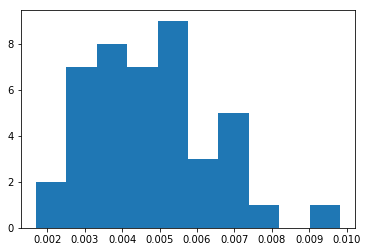

meanF0Hz


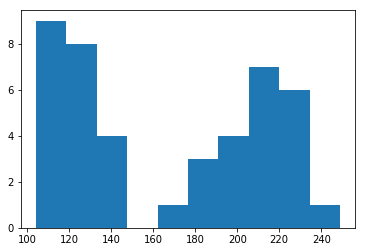

stdevF0Hz


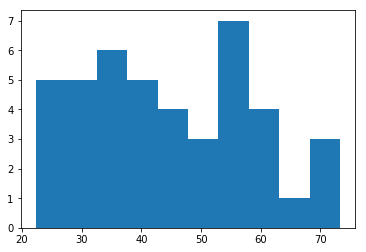

HNR


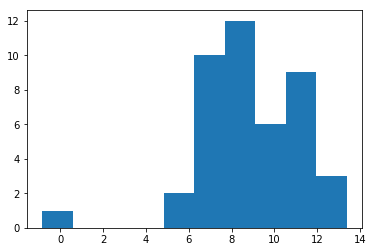

localJitter


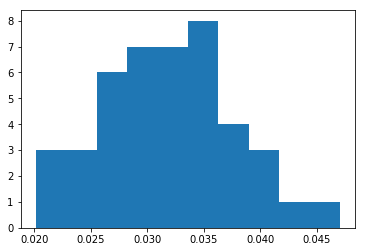

localabsoluteJitter


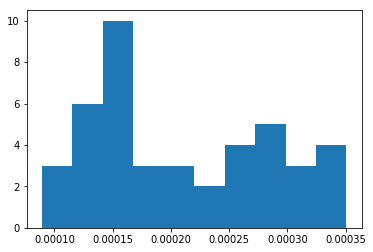

rapJitter


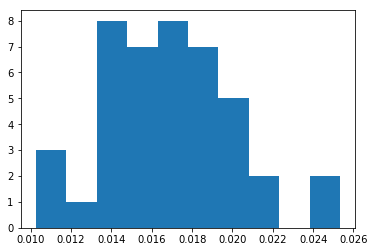

ppq5Jitter


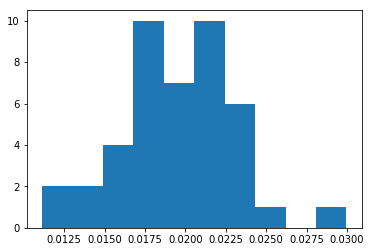

ddpJitter


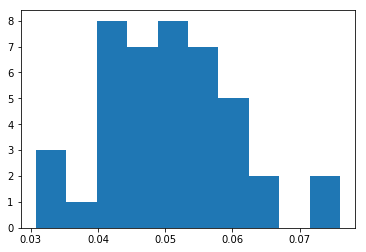

localShimmer


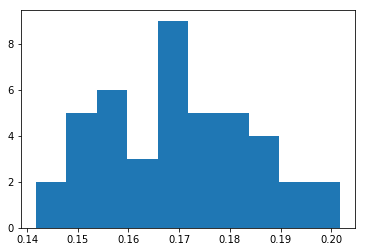

localdbShimmer


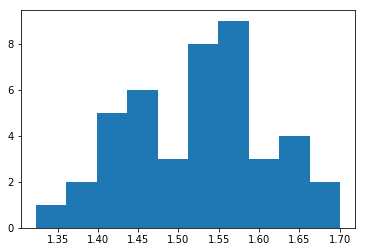

apq3Shimmer


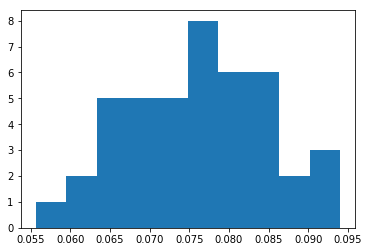

apq5Shimmer


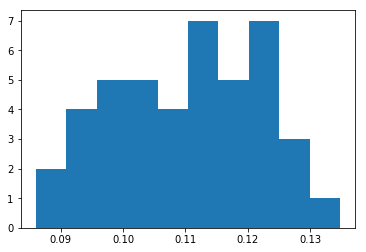

apq11Shimmer


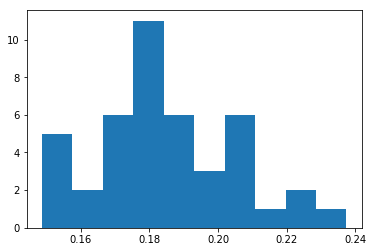

ddaShimmer


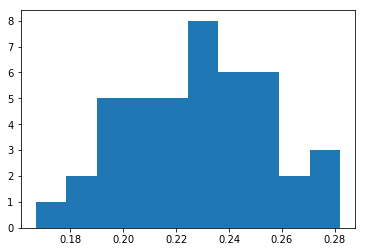

JitterPCA


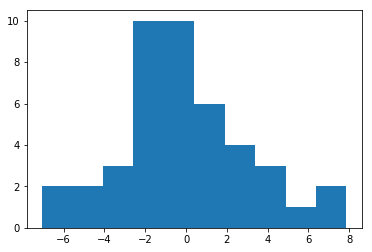

ShimmerPCA


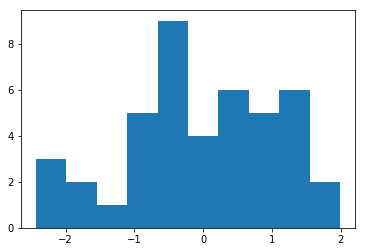

spectrum_0


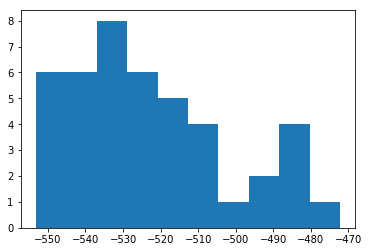

spectrum_1


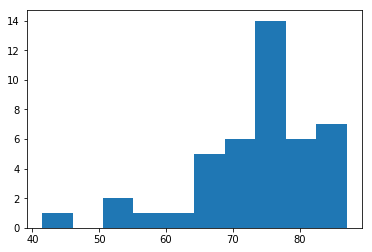

spectrum_2


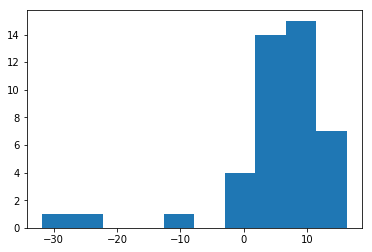

spectrum_4


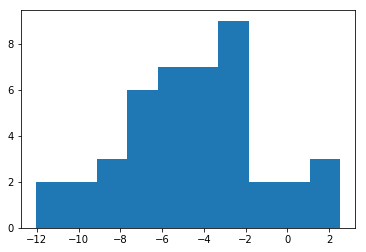

spectrum_3


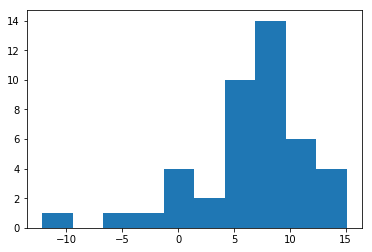

spectrum_5


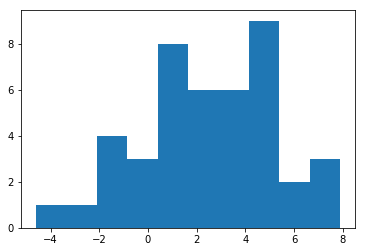

spectrum_6


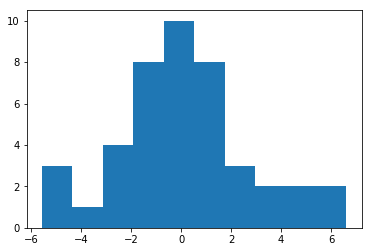

spectrum_7


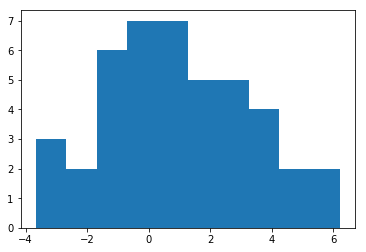

spectrum_8


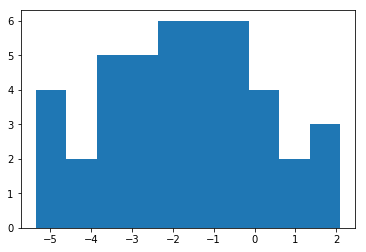

spectrum_9


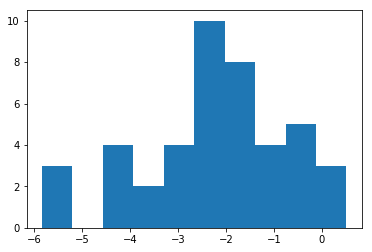

spectrum_10


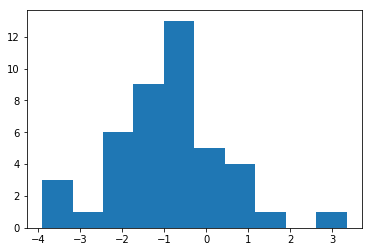

spectrum_11


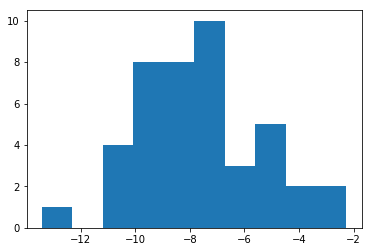

spectrum_12


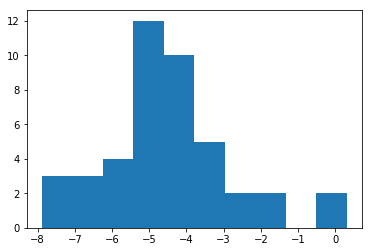

spectrum_13


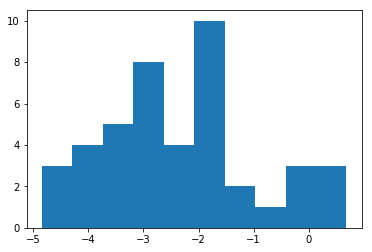

spectrum_14


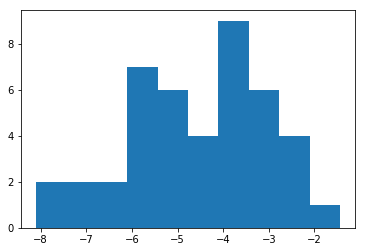

spectrum_15


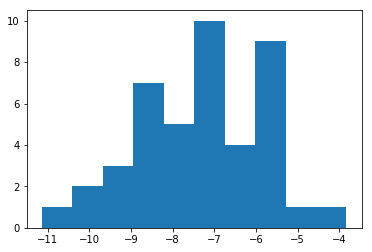

spectrum_16


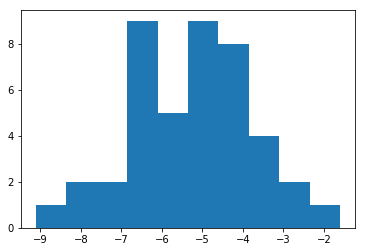

spectrum_17


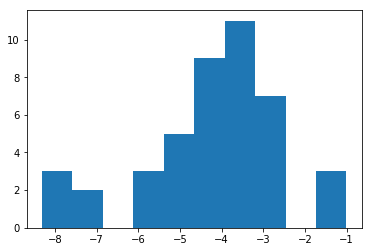

spectrum_18


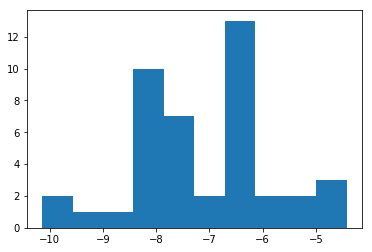

spectrum_19


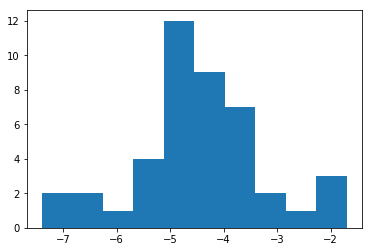

spectrum_20


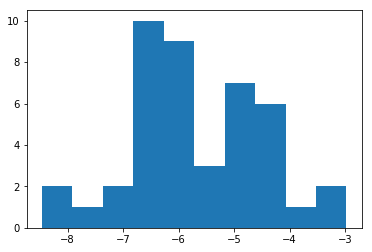

spectrum_21


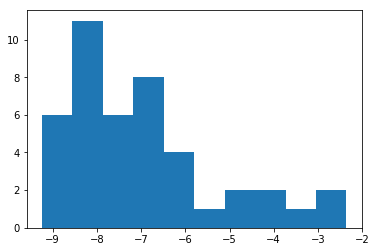

spectrum_22


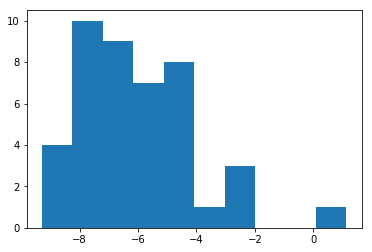

spectrum_23


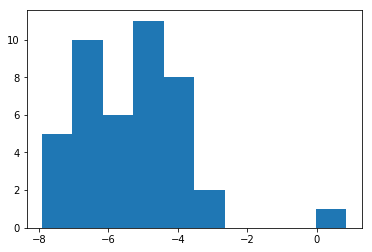

spectrum_24


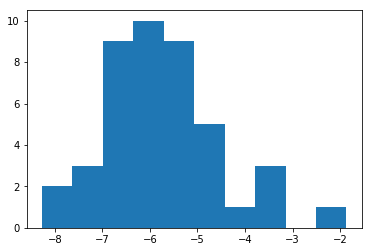

spectrum_25


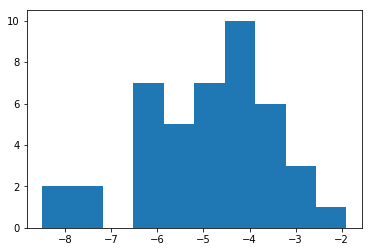

spectrum_26


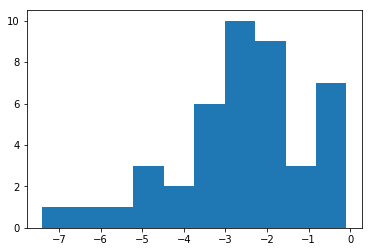

spectrum_27


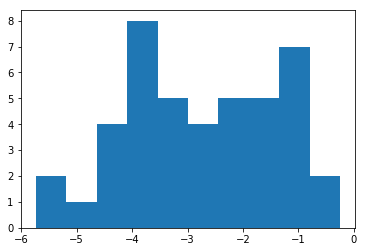

spectrum_28


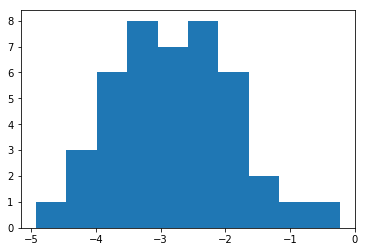

spectrum_29


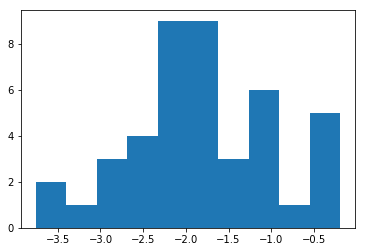

spectrum_30


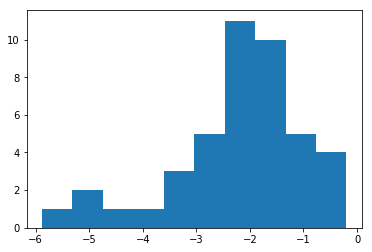

spectrum_31


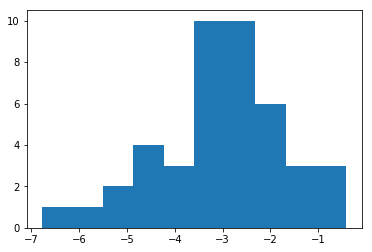

spectrum_32


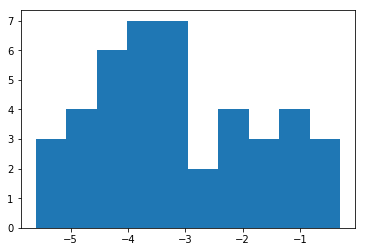

spectrum_33


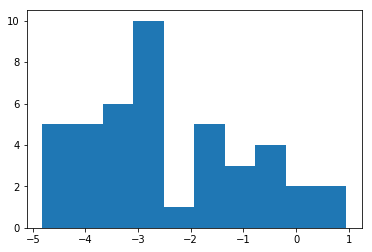

spectrum_34


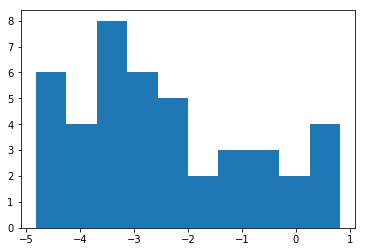

spectrum_35


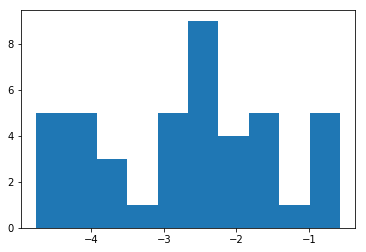

spectrum_36


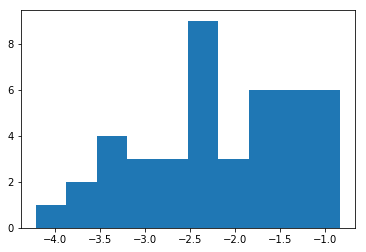

spectrum_37


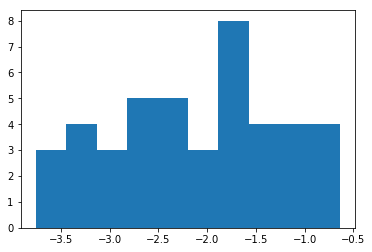

spectrum_38


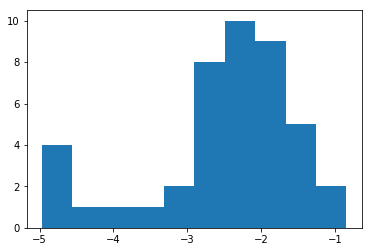

spectrum_39


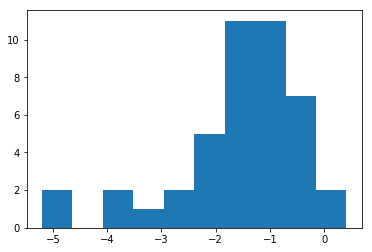

In [8]:
a=0
for i in audio:
    print (i)
    plt.hist(((df_audio[df_audio.asc==0].groupby('vpn').mean()[i])))
    plt.show()


In [9]:
y, sr = librosa.load(audio_file, sr=None) // sr is none so librosa can sample the audion using the convenient sr
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=13, hop_length=int(0.010sr), n_fft=int(0.025sr))
-To set the width of window to 25 ms you have tu multiply the sr and 0.025.The reason behind that is that sr is the number of samples in one second. so to get the number of samples in 25ms you have to multiply by 0.025.
-same thing for the stride, to get a stride of 10 ms, you need to multiply the sr and 0.010.

SyntaxError: invalid syntax (<ipython-input-9-de9f99a3dcc2>, line 1)

In [ ]:
# Graphs for audio

time = [i*rate for i in range(1,rmse.shape[1]+1)] #get corresponding time values for frames
plt.figure(1)
plt.plot(time, rmse[0])
plt.show()


y, sr = librosa.load(conv_path)
S=librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(librosa.power_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

zcrs = librosa.feature.zero_crossing_rate(data)
plt.figure(2)
plt.plot(time, zcrs[0])
plt.show()